In [ ]:
import fiftyone as fo

# Load COCO dataset
dataset = fo.zoo.load_zoo_dataset("coco-2017", split="validation", max_samples=100)

# Launch the app for interactive visualization
session = fo.launch_app(dataset)

In [ ]:
import fiftyone as fo

# data_path="Car-Parts-Segmentation/trainingset/JPEGImages"
# labels_path="Car-Parts-Segmentation/trainingset/annotations.json"

data_path = "../datasets/Fuji-Apple-Segmentation_coco/trainingset/JPEGImages"
labels_path = "../datasets/Fuji-Apple-Segmentation_coco/trainingset/annotations.json"

data_path = "../datasets/image_envy_5000_coco/trainingset/JPEGImages"
labels_path = "../datasets/image_envy_5000_coco/trainingset/annotations.json"


coco_dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=data_path,
    labels_path=labels_path,
    include_id=True,
)

# COCO categories are also imported
print(coco_dataset.info["categories"])
# [{'id': 1, 'name': 'airplane', 'supercategory': None}, ...]

# print(coco_dataset)
session = fo.launch_app(coco_dataset)

Model: maskrcnn_resnet50_fpn_v2
Num classes: 9
In features box: 1024
In features mask: 256
Dim reduced: 256
loading annotations into memory...
Done (t=0.50s)
creating index...
index created!
loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
ann_ids: [1, 2]
train_ds.coco.loadImgs(1):
[{'id': 1, 'file_name': '0000_rgb_0001.jpg', 'width': 1920, 'height': 1080}]
train_ds.coco.annToMask(ann):
mask.shape: (1080, 1920)
mask.sum(): 100969
train_ds.coco.annToMask(ann):
mask.shape: (1080, 1920)
mask.sum(): 123409
ann_ids: [3, 4]
train_ds.coco.loadImgs(2):
[{'id': 2, 'file_name': '0001_rgb_0001.jpg', 'width': 1920, 'height': 1080}]
train_ds.coco.annToMask(ann):
mask.shape: (1080, 1920)
mask.sum(): 94020
train_ds.coco.annToMask(ann):
mask.shape: (1080, 1920)
mask.sum(): 117559
ann_ids: [5, 6]
train_ds.coco.loadImgs(3):
[{'id': 3, 'file_name': '0002_rgb_0001.jpg', 'width': 1920, 'height': 1080}]
train_ds.coco.annToMask(ann):
mask.shape: (1080, 1920)
mask.sum(): 7422

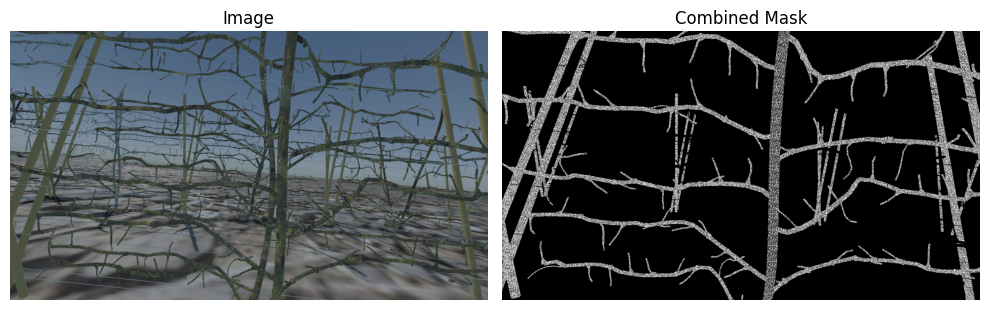

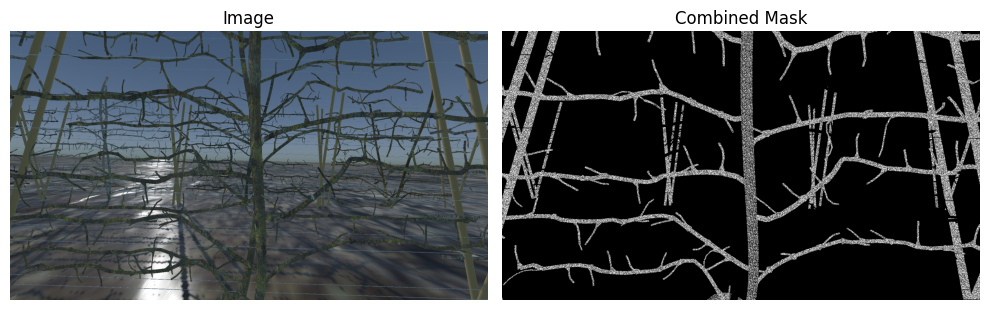

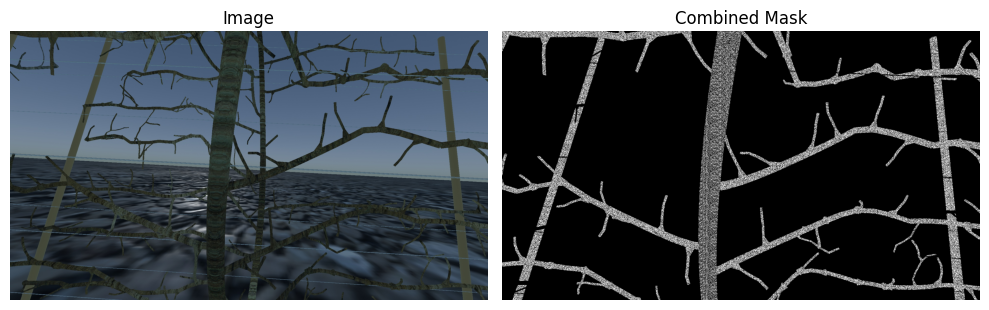

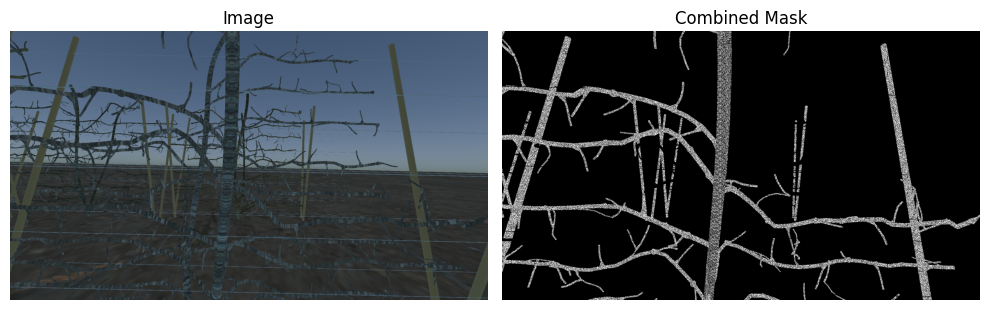

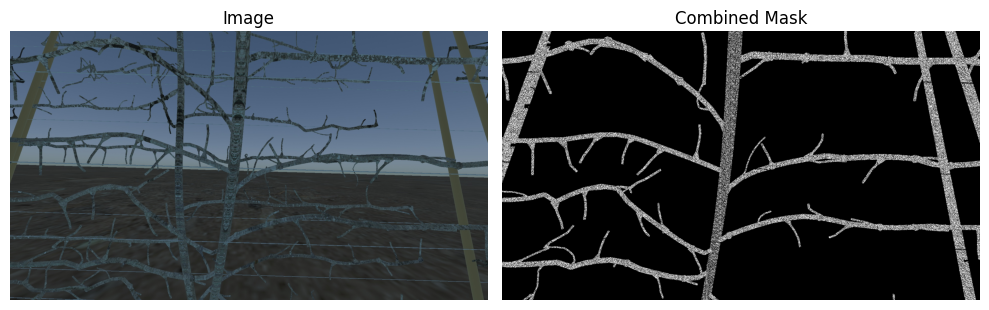

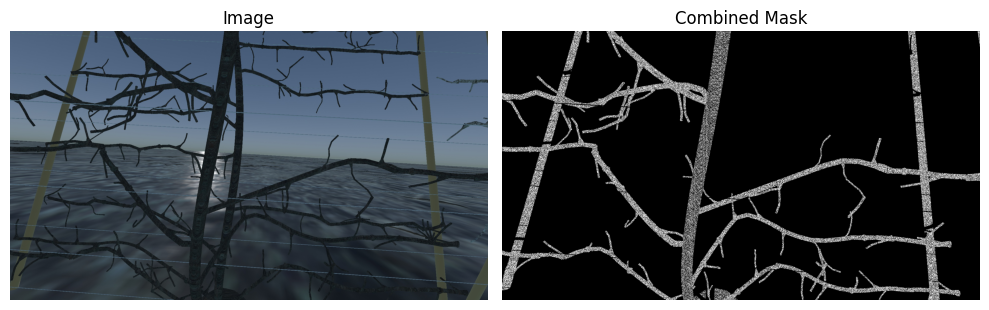

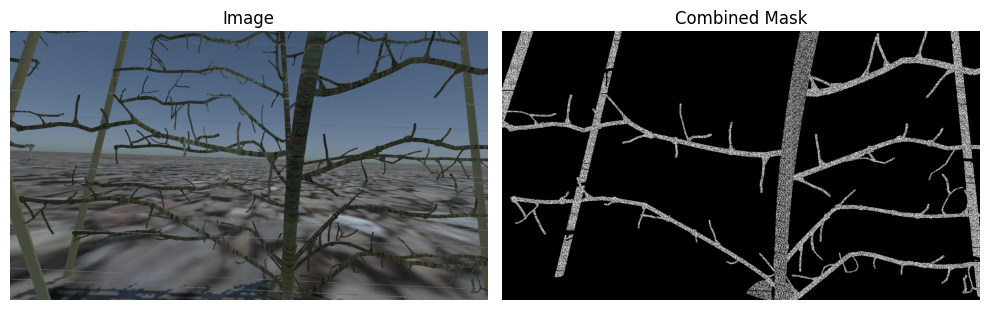

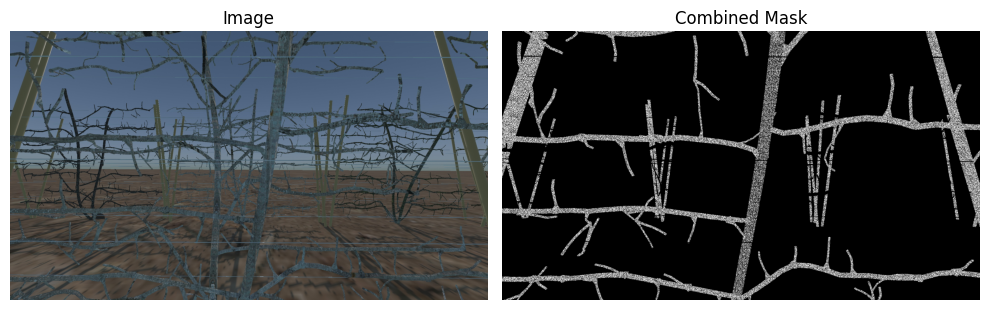

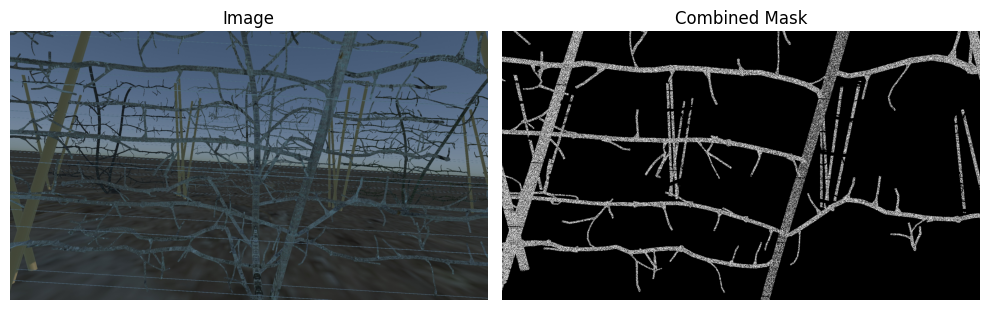

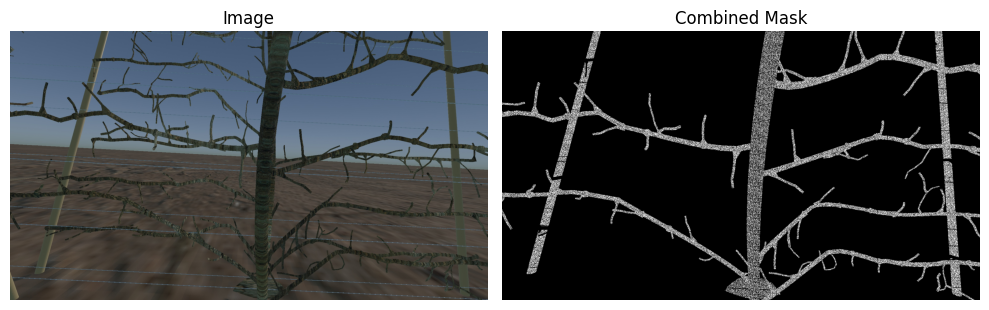

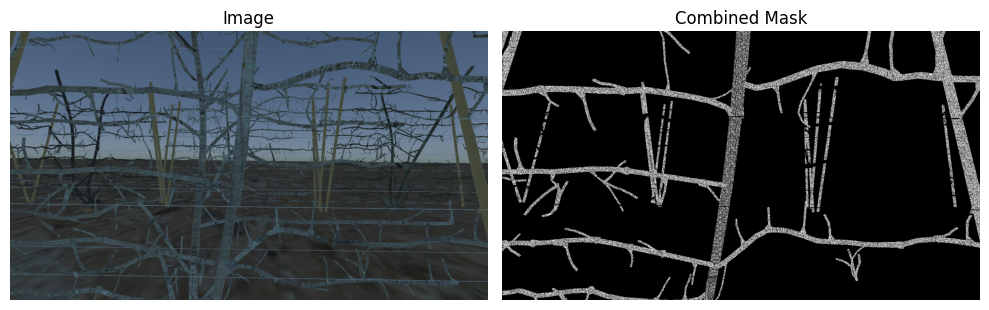

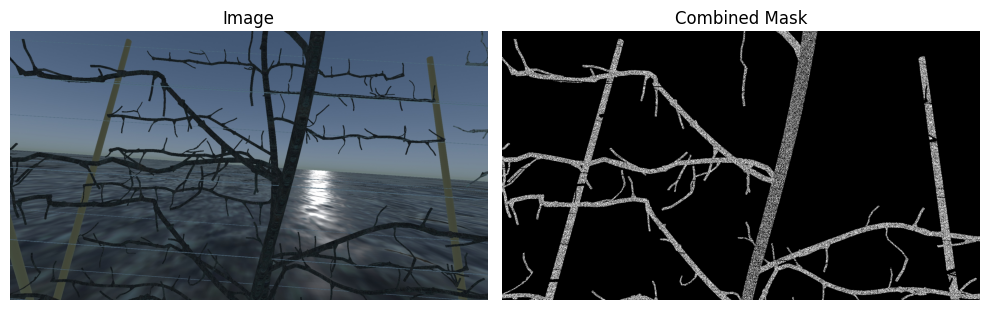

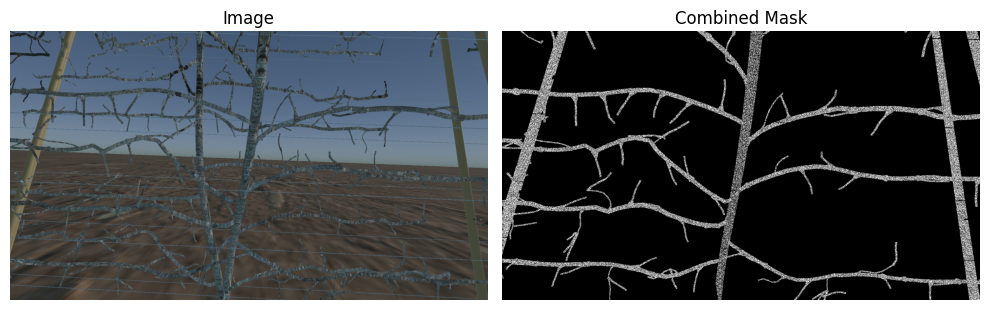

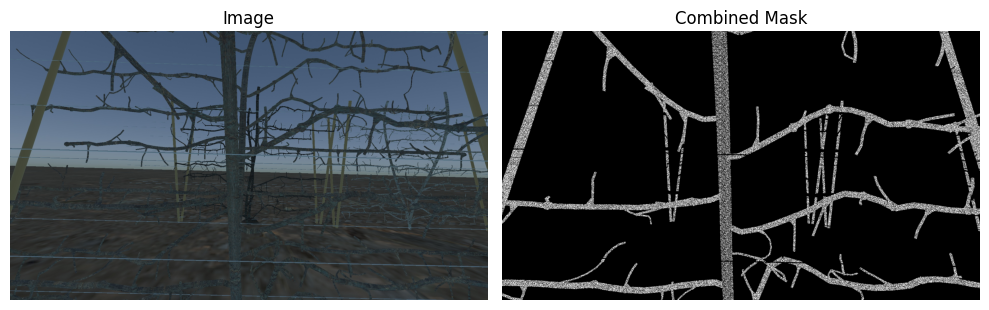

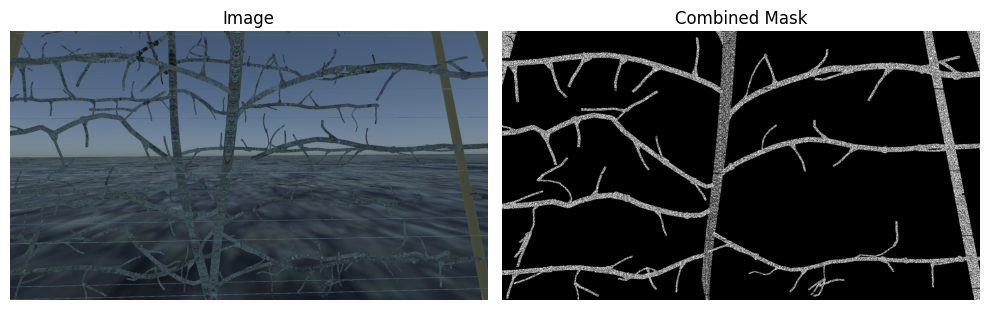

In [7]:
from core import CocoSegmentationDataset, build_model, detection_collate
import matplotlib.pyplot as plt

build_model(num_classes=9)

# Play with COCO dataset
train_ds = CocoSegmentationDataset(
    "Fuji-Apple-Segmentation/trainingset/JPEGImages",
    "Fuji-Apple-Segmentation/trainingset/annotations.json",
)

train_ds = CocoSegmentationDataset(
    "image_envy_5000_coco/trainingset/JPEGImages",
    "image_envy_5000_coco/trainingset/annotations.json",
)# train_ds = CocoSegmentationDataset(
#     "Car-Parts-Segmentation/trainingset/JPEGImages",
#     "Car-Parts-Segmentation/trainingset/annotations.json",
# )
# Print shape of all masks in the dataset
# for idx in range(len(train_ds)):
#     _, target = train_ds[idx]
#     if "masks" in target:
#         print(f"Sample {idx}: mask shape = {target['masks'].shape}")
#     else:
#         print(f"Sample {idx}: No mask found")


def display_ds_item(train_ds, idx):
    # __getitem__ usually returns (image, target)
    img, target = train_ds[i]
    img_np = img.permute(1, 2, 0).cpu().numpy()
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_np)
    axes[0].set_title("Image")
    axes[0].axis("off")
    # Visualize mask (showing the merged mask from all instances)
    if "masks" in target and target["masks"].ndim == 3:
        mask_all = target["masks"].sum(dim=0)
        axes[1].imshow(mask_all.cpu().numpy(), cmap="gray")
        axes[1].set_title("Combined Mask")
    else:
        axes[1].text(0.5, 0.5, "No mask", ha="center", va="center")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()


img_keys = list(train_ds.coco.imgs.keys())
for idx in img_keys:
    ann_ids = train_ds.coco.getAnnIds(imgIds=idx)
    print("ann_ids:", ann_ids)
    print(f"train_ds.coco.loadImgs({idx}):")
    print(train_ds.coco.loadImgs(idx))
    anns = train_ds.coco.loadAnns(ann_ids)
    # print("anns:")
    # print(anns)
    for ann in anns:
        print("train_ds.coco.annToMask(ann):")
        mask = train_ds.coco.annToMask(ann)
        print("mask.shape:", mask.shape)
        print("mask.sum():", mask.sum())

# Visualize images and masks: show first 5 samples
for i in range(15):
    display_ds_item(train_ds, i)

In [ ]:
sample = coco_dataset.first()
print(sample)
import json

print(json.dumps(sample.to_dict(), indent=2))

# Get the absolute path of the current file

with open("filename", "w") as f:
    json.dump(sample.to_dict(), f)